In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import glob

In [2]:
data_dir = '/media/ubuntu/MyHDataStor2/datasets/COVID-19/ICCV-MIA/segmentation'


In [3]:
image_path = data_dir + '/kaggle/2d_images/'
mask_path = data_dir + '/kaggle/2d_masks/'

In [4]:
valid_exts = [".tif"] # file extensions

load image from path

In [5]:
image_list = [i for i in sorted(os.listdir(image_path)) if os.path.splitext(i)[1].lower() in valid_exts]
mask_list = [m for m in sorted(os.listdir(mask_path)) if os.path.splitext(m)[1].lower() in valid_exts]

In [6]:
image_list[:10] # list of image in file

['ID_0000_Z_0142.tif',
 'ID_0001_Z_0146.tif',
 'ID_0002_Z_0162.tif',
 'ID_0003_Z_0132.tif',
 'ID_0004_Z_0066.tif',
 'ID_0005_Z_0066.tif',
 'ID_0006_Z_0206.tif',
 'ID_0007_Z_0211.tif',
 'ID_0008_Z_0065.tif',
 'ID_0009_Z_0114.tif']

In [7]:
mask_list[:10] # list of mask image in file

['ID_0000_Z_0142.tif',
 'ID_0001_Z_0146.tif',
 'ID_0002_Z_0162.tif',
 'ID_0003_Z_0132.tif',
 'ID_0004_Z_0066.tif',
 'ID_0005_Z_0066.tif',
 'ID_0006_Z_0206.tif',
 'ID_0007_Z_0211.tif',
 'ID_0008_Z_0065.tif',
 'ID_0009_Z_0114.tif']

In [8]:
img = cv2.imread(image_path + image_list[0], -1)
#img = cv2.imread(image_path + image_list[0])

In [9]:
img.shape

(512, 512)

'*.tif' format include alpha channel

'64791' include alpha channel

In [10]:
img[0,10]

64791

image value type is unsigned int

In [11]:
type(img[0,10])

numpy.uint16

The lungs image shape is 16bit(grayscale(8), alpha(8))

In [12]:
"{0:b}".format(64791)

'1111110100010111'

In [13]:
img = cv2.imread(image_path + image_list[0], 0)
img[0,10]

253

In [14]:
"{0:b}".format(253)

'11111101'

In [15]:
img.shape

(512, 512)

In [16]:
np.unique(img)

array([  0,   1,   2,   3,   4, 252, 253, 254, 255], dtype=uint8)

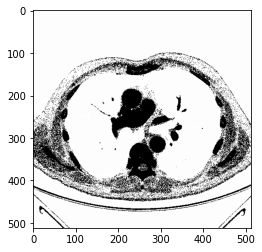

In [17]:
plt.imshow(img, cmap = 'gray')
plt.show()

In [18]:
IMG_H, IMG_W = 512, 512

In [19]:
dataX, dataY = np.empty((2, len(image_list), IMG_H, IMG_W, 1), dtype=np.float32)

In [20]:
dataX.shape

(267, 512, 512, 1)

image resize

In [21]:
for i, image in enumerate(image_list):
    
    # changing value type uint to int, float is changed to calculate
    img = cv2.imread(image_path + image, cv2.IMREAD_UNCHANGED).astype("int16").astype('float32')
    img = cv2.resize(img, dsize=(IMG_W, IMG_H))
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    
    dataX[i] = np.expand_dims(img, axis = 2)
    
for i, image in enumerate(mask_list):
    img = cv2.imread(mask_path + image, cv2.IMREAD_UNCHANGED).astype('float32')
    img = cv2.resize(img, dsize=(IMG_W, IMG_H))
    dataY[i] = np.expand_dims(img, axis = 2)
dataY /= 255.

In [22]:
dataX.shape

(267, 512, 512, 1)

In [23]:
dataY.shape

(267, 512, 512, 1)

In [24]:
np.unique(dataX[0,0,:10])

array([0.02517623, 0.03524673, 0.04028197, 0.04682779, 0.05287009,
       0.05387714, 0.05689829, 0.05891239, 0.06898288, 0.08862034],
      dtype=float32)

In [25]:
np.unique(dataY)

array([0., 1.], dtype=float32)

rescale of image

plot image and mask of image

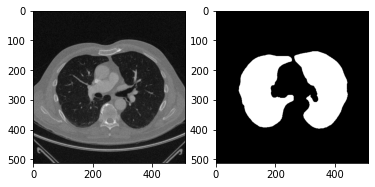

In [26]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(dataX[0].squeeze(), cmap='gray')
ax[1].imshow(dataY[0].squeeze(), cmap='gray')
plt.show()

Divide train and test data

In [27]:
trainX, testX = train_test_split(dataX, test_size = 0.2, random_state=50)
trainY, testY = train_test_split(dataY, test_size = 0.2, random_state=50)

In [28]:
save_dir = data_dir + "dataset/" # path where you want to save

if not os.path.exists(save_dir): # if there is no exist, make the path
    os.makedirs(save_dir)
    
np.save(save_dir+'x_train_512.npy', trainX)
np.save(save_dir+'y_train_512.npy', trainY)
np.save(save_dir+'x_test_512.npy', testX)
np.save(save_dir+'y_test_512.npy', testY)

print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(213, 512, 512, 1) (213, 512, 512, 1)
(54, 512, 512, 1) (54, 512, 512, 1)
